In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import os
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import neighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
import itertools
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.models import Sequential
from google.colab import files
import math
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models, regularizers, Input

In [ ]:
# def combine_csv_files(years):

#     # List to store all DataFrames
#     all_dfs = []

#     # Iterate through specified years
#     for year in years:
#         # List to store DataFrames for current year
#         year_dfs = []

#         # Iterate through files from (1) to (12)
#         for i in range(1, 13):
#             filename = f'{year} ({i}).csv'

#             # Check if file exists before trying to read
#             if os.path.exists(filename):
#                 try:
#                     df = pd.read_csv(filename)
#                     # Add a column to track the original year
#                     df['original_year'] = year
#                     year_dfs.append(df)
#                 except Exception as e:
#                     print(f"Error reading {filename}: {e}")

#         # Combine DataFrames for current year
#         if year_dfs:
#             year_combined_df = pd.concat(year_dfs, ignore_index=True)
#             all_dfs.append(year_combined_df)

#     # Combine all years
#     if all_dfs:
#         final_combined_df = pd.concat(all_dfs, ignore_index=True)
#         return final_combined_df
#     else:
#         print("No CSV files found")
#         return None

# # Combine files for 2019 and 2020
# years_to_combine = [2019, 2020]
# combined_df = combine_csv_files(years_to_combine)

# if combined_df is not None:
#     # Save combined file
#     output_filename = 'combined_2019_2020.csv'
#     combined_df.to_csv(output_filename, index=False)
#     print(f"Combined CSV saved as {output_filename}")

#     # Optional: Print basic information about the combined dataset
#     print("\nDataset Information:")
#     print(f"Total rows: {len(combined_df)}")
#     print(f"Columns: {list(combined_df.columns)}")
#     print("\nYear distribution:")
#     print(combined_df['original_year'].value_counts())

# # Optional: If you're in a Google Colab environment and want to download
# # from google.colab import files
# # files.download('combined_2019_2020.csv')

In [ ]:
df = pd.read_csv('combined_2019_2020.csv')
print(df.shape)
orig_df = df.copy()
df.head()

(17544, 31)


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,original_year
0,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 00:00,2019,5,1,00:00,8.8,NaN,0.7,NaN,57.0,NaN,NaN,NaN,30.0,NaN,4.0,NaN,24.1,NaN,100.99,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 01:00,2019,5,1,01:00,8.9,NaN,-0.3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.1,NaN,101.00,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019
2,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 02:00,2019,5,1,02:00,8.2,NaN,0.5,NaN,58.0,NaN,NaN,NaN,35.0,NaN,7.0,NaN,24.1,NaN,100.96,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 03:00,2019,5,1,03:00,8.1,NaN,0.3,NaN,58.0,NaN,NaN,NaN,2.0,NaN,5.0,NaN,24.1,NaN,100.96,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 04:00,2019,5,1,04:00,8.2,NaN,0.6,NaN,58.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.1,NaN,100.97,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019


	Temp (°C)	Wind Spd (km/h)	Visibility (km)	Wind Chill	hour	month
253	2.192121	-0.242520	2.089295	0.236077	13	5
31	-0.303547	1.642510	0.500805	0.236077	7	5
5396	-0.866594	0.482491	-0.339388	0.236077	20	12
706	0.989939	-0.967532	-0.024316	0.236077	10	5
14100	-0.562244	1.062501	-0.818561	0.236077	12	12


In [ ]:
weather_counts = df['Weather'].value_counts(dropna=False)

print(weather_counts)

Weather
NaN                                       9208
Mostly Cloudy                             1783
Rain                                      1110
Cloudy                                     991
Mainly Clear                               979
Rain Showers                               861
Clear                                      856
Fog                                        392
Rain,Fog                                   387
Moderate Rain,Fog                          133
Snow                                       130
Moderate Rain                              120
Smoke                                       98
Rain Showers,Fog                            70
Drizzle,Fog                                 65
Moderate Rain Showers                       48
Fog,Smoke                                   45
Smoke,Haze                                  37
Rain,Snow                                   37
Drizzle                                     24
Freezing Fog                                20
Rain,

In [ ]:
weather_types = ['Mostly Cloudy', 'Rain', 'Cloudy', 'Mainly Clear',
                   'Rain Showers', 'Clear', 'Fog', 'Rain,Fog',
                   'Moderate Rain,Fog', 'Snow', 'Moderate Rain',
                   'Smoke', 'Rain Showers,Fog']
new_df = df[df['Weather'].isin(weather_types)].groupby('Weather').head(70)


In [ ]:
print(new_df.shape)
new_df.head()

(910, 31)


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,original_year
1,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 01:00,2019,5,1,01:00,8.9,NaN,-0.3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.1,NaN,101.00,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019
4,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 04:00,2019,5,1,04:00,8.2,NaN,0.6,NaN,58.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.1,NaN,100.97,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019
7,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 07:00,2019,5,1,07:00,9.0,NaN,2.1,NaN,62.0,NaN,NaN,NaN,9.0,NaN,9.0,NaN,48.3,NaN,101.01,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019
10,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 10:00,2019,5,1,10:00,13.9,NaN,1.9,NaN,44.0,NaN,NaN,NaN,19.0,NaN,23.0,NaN,48.3,NaN,101.01,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019
13,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 13:00,2019,5,1,13:00,16.2,NaN,0.0,NaN,33.0,NaN,NaN,NaN,22.0,NaN,23.0,NaN,48.3,NaN,100.91,NaN,NaN,NaN,NaN,NaN,Mainly Clear,2019


In [ ]:
unique_values = new_df['Weather'].unique()
print(unique_values.shape)

(13,)


In [ ]:
# unique_components = set()
# for item in unique_values:
#     if isinstance(item, str):  # Ignore non-string entries (e.g., NaN)
#         components = item.split()  # Split on commas
#         unique_components.update([component.strip() for component in components])  # Strip spaces

# # Convert the set to a sorted list
# unique_list = sorted(unique_components)

# print(unique_list)
# print(len(unique_list))

In [ ]:
df=new_df.copy()

In [ ]:
df.drop([
    'Temp Flag', 'Dew Point Temp Flag', 'Rel Hum Flag',
    'Precip. Amount (mm)', 'Precip. Amount Flag', 'Wind Dir Flag',
    'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill Flag','Visibility Flag','Wind Spd Flag'
], axis=1, inplace=True)
print(df.shape)
df.head()

(910, 19)


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Weather,original_year
1,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 01:00,2019,5,1,01:00,8.9,-0.3,52.0,NaN,0.0,24.1,101.00,NaN,Mostly Cloudy,2019
4,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 04:00,2019,5,1,04:00,8.2,0.6,58.0,NaN,0.0,24.1,100.97,NaN,Mostly Cloudy,2019
7,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 07:00,2019,5,1,07:00,9.0,2.1,62.0,9.0,9.0,48.3,101.01,NaN,Mostly Cloudy,2019
10,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 10:00,2019,5,1,10:00,13.9,1.9,44.0,19.0,23.0,48.3,101.01,NaN,Mostly Cloudy,2019
13,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 13:00,2019,5,1,13:00,16.2,0.0,33.0,22.0,23.0,48.3,100.91,NaN,Mainly Clear,2019


In [ ]:
df.drop(['Date/Time (LST)','Climate ID','Station Name','Longitude (x)','Latitude (y)','original_year'],axis=1,inplace=True)
print(df.shape)
df.head()

(910, 13)


,Year,Month,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Weather
1,2019,5,1,01:00,8.9,-0.3,52.0,NaN,0.0,24.1,101.00,NaN,Mostly Cloudy
4,2019,5,1,04:00,8.2,0.6,58.0,NaN,0.0,24.1,100.97,NaN,Mostly Cloudy
7,2019,5,1,07:00,9.0,2.1,62.0,9.0,9.0,48.3,101.01,NaN,Mostly Cloudy
10,2019,5,1,10:00,13.9,1.9,44.0,19.0,23.0,48.3,101.01,NaN,Mostly Cloudy
13,2019,5,1,13:00,16.2,0.0,33.0,22.0,23.0,48.3,100.91,NaN,Mainly Clear


In [ ]:
# Count NaN values for each column
nan_counts = df.isna().sum()

# Filter and display only columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]

print("Columns with NaN values:")
print(columns_with_nan)

# Optional: Calculate percentage of NaN values for each column
nan_percentages = (nan_counts / len(df)) * 100
columns_with_nan_percentages = nan_percentages[nan_percentages > 0]

Columns with NaN values:
Wind Dir (10s deg)     89
Wind Spd (km/h)         1
Wind Chill            857
dtype: int64


In [ ]:
df['Wind Chill'] = df['Wind Chill'].fillna(0)
df['Wind Dir (10s deg)'] = df['Wind Dir (10s deg)'].fillna(1)
df['Wind Spd (km/h)'] = df['Wind Spd (km/h)'].fillna(0)

In [ ]:
# Count NaN values for each column
nan_counts2 = df.isna().sum()

# Filter and display only columns with NaN values
columns_with_nan2 = nan_counts2[nan_counts2 > 0]

print("Columns with NaN values:")
print(columns_with_nan2)

# Optional: Calculate percentage of NaN values for each column
nan_percentages2 = (nan_counts2 / len(df)) * 100
columns_with_nan_percentages2 = nan_percentages2[nan_percentages2 > 0]

Columns with NaN values:
Series([], dtype: int64)


In [ ]:
nan_count = orig_df['Weather'].isna().sum()
total_entries = len(orig_df['Weather'])
nan_percentage = (nan_count / total_entries) * 100

print(f"Number of NaN values: {nan_count}")
print(f"Total entries without nan: {total_entries-nan_count}")
print(f"Percentage of NaN values: {nan_percentage:.2f}%")

Number of NaN values: 9208
Total entries without nan: 8336
Percentage of NaN values: 52.49%


In [ ]:
final_test = orig_df[orig_df['Weather'].isna()]
orig_df2 = df.dropna(subset=['Weather'])

In [ ]:
orig_df2.dropna(inplace=True)
# Count NaN values for each column
nan_counts2 = orig_df2.isna().sum()

# Filter and display only columns with NaN values
columns_with_nan2 = nan_counts2[nan_counts2 > 0]

print("Columns with NaN values:")
print(columns_with_nan2)

# Optional: Calculate percentage of NaN values for each column
nan_percentages2 = (nan_counts2 / len(orig_df2)) * 100
columns_with_nan_percentages2 = nan_percentages2[nan_percentages2 > 0]

Columns with NaN values:
Series([], dtype: int64)


In [ ]:
orig_df['Weather'].head()

,Weather
0,NaN
1,Mostly Cloudy
2,NaN
3,NaN
4,Mostly Cloudy


In [ ]:
df.head()

,Year,Month,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Weather
1,2019,5,1,01:00,8.9,-0.3,52.0,1.0,0.0,24.1,101.00,0.0,Mostly Cloudy
4,2019,5,1,04:00,8.2,0.6,58.0,1.0,0.0,24.1,100.97,0.0,Mostly Cloudy
7,2019,5,1,07:00,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,Mostly Cloudy
10,2019,5,1,10:00,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,Mostly Cloudy
13,2019,5,1,13:00,16.2,0.0,33.0,22.0,23.0,48.3,100.91,0.0,Mainly Clear


In [ ]:
print(final_test.shape)
df.shape

(9208, 31)


(910, 13)

In [ ]:
final_test = final_test.drop('Weather', axis=1)
final_test.dropna(inplace=True)
final_test.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,original_year


In [ ]:
def create_cyclical_features(df, col_name, period):
    df[f'{col_name}_sin'] = np.sin(2 * np.pi * df[col_name]/period)
    df[f'{col_name}_cos'] = np.cos(2 * np.pi * df[col_name]/period)
    return df

def preprocess_weather_data(df):
    """Main preprocessing function for weather data"""
    # Create a copy to avoid modifying original data
    processed_df = df.copy()

    # Extract hour from Time (LST)
    processed_df['hour'] = pd.to_datetime(processed_df['Time (LST)'], format='%H:%M').dt.hour

    # Create datetime column correctly
    processed_df['datetime'] = pd.to_datetime(
        processed_df['Year'].astype(str) + '-' +
        processed_df['Month'].astype(str).str.zfill(2) + '-' +
        processed_df['Day'].astype(str).str.zfill(2) + ' ' +
        processed_df['Time (LST)']
    )

    # Drop original temporal columns early
    columns_to_drop = ['Year', 'Month', 'Day', 'Time (LST)', 'Wind Dir (10s deg)']
    processed_df = processed_df.drop(columns=columns_to_drop)

    # Extract temporal components
    processed_df['month'] = processed_df['datetime'].dt.month
    processed_df['day'] = processed_df['datetime'].dt.day
    processed_df['year'] = processed_df['datetime'].dt.year

    # Create cyclical features
    processed_df = create_cyclical_features(processed_df, 'hour', 24)
    processed_df = create_cyclical_features(processed_df, 'day', 31)
    processed_df = create_cyclical_features(processed_df, 'month', 12)

    # Additional time features
    processed_df['day_of_week'] = processed_df['datetime'].dt.dayofweek
    processed_df['is_weekend'] = processed_df['day_of_week'].isin([5, 6]).astype(int)

    # Create seasons (meteorological seasons)
    processed_df['season'] = pd.cut(processed_df['month'],
                                  bins=[0, 3, 6, 9, 12],
                                  labels=['winter', 'spring', 'summer', 'fall'],
                                  include_lowest=True)

    # Create hour segments
    processed_df['hour_segment'] = pd.cut(processed_df['hour'],
                                        bins=[0, 6, 12, 18, 24],
                                        labels=['night', 'morning', 'afternoon', 'evening'],
                                        include_lowest=True)

    # Process wind direction features directly from original data
    processed_df['wind_dir_sin'] = np.sin(2 * np.pi * df['Wind Dir (10s deg)'] / 360)
    processed_df['wind_dir_cos'] = np.cos(2 * np.pi * df['Wind Dir (10s deg)'] / 360)

    # Create wind components
    wind_dir_rad = np.radians(df['Wind Dir (10s deg)'] * 10)
    processed_df['u_wind'] = df['Wind Spd (km/h)'] * np.sin(wind_dir_rad)
    processed_df['v_wind'] = df['Wind Spd (km/h)'] * np.cos(wind_dir_rad)

    # Temperature features
    processed_df['temp_dew_diff'] = processed_df['Temp (°C)'] - processed_df['Dew Point Temp (°C)']

    # Create daily temperature ranges
    daily_temp = processed_df.groupby([processed_df['datetime'].dt.date])['Temp (°C)']
    processed_df['daily_temp_min'] = daily_temp.transform('min')
    processed_df['daily_temp_max'] = daily_temp.transform('max')
    processed_df['daily_temp_range'] = processed_df['daily_temp_max'] - processed_df['daily_temp_min']

    # Create interaction features
    processed_df['temp_humidity'] = processed_df['Temp (°C)'] * processed_df['Rel Hum (%)']
    processed_df['wind_temp'] = processed_df['Wind Spd (km/h)'] * processed_df['Temp (°C)']
    processed_df['visibility_humidity'] = processed_df['Visibility (km)'] * processed_df['Rel Hum (%)']

    # Scale numerical features
    scaler = StandardScaler()
    numerical_columns = [
        'Temp (°C)', 'Dew Point Temp (°C)', 'Wind Chill',
        'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)',
        'Rel Hum (%)', 'temp_dew_diff', 'daily_temp_range',
        'u_wind', 'v_wind', 'temp_humidity', 'wind_temp',
        'visibility_humidity'
    ]

    processed_df[numerical_columns] = scaler.fit_transform(processed_df[numerical_columns])

    # Convert categorical variables to dummy variables
    categorical_columns = ['season', 'hour_segment']
    processed_df = pd.get_dummies(processed_df, columns=categorical_columns, prefix=categorical_columns)

    # Convert dummy variables to int
    dummy_columns = [col for col in processed_df.columns if col.startswith(('season_', 'hour_segment_'))]
    processed_df[dummy_columns] = processed_df[dummy_columns].astype(int)

    # Drop datetime at the end
    processed_df = processed_df.drop(columns=['datetime'])

    return processed_df

# Process your existing data
processed_df = preprocess_weather_data(df)

# Show results
print("Original DataFrame Shape:", df.shape)
print("Processed DataFrame Shape:", processed_df.shape)
print("\nColumns in processed data:")
print(processed_df.columns.tolist())

Original DataFrame Shape: (910, 13)
Processed DataFrame Shape: (910, 39)

Columns in processed data:
['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Wind Chill', 'Weather', 'hour', 'month', 'day', 'year', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'day_of_week', 'is_weekend', 'wind_dir_sin', 'wind_dir_cos', 'u_wind', 'v_wind', 'temp_dew_diff', 'daily_temp_min', 'daily_temp_max', 'daily_temp_range', 'temp_humidity', 'wind_temp', 'visibility_humidity', 'season_winter', 'season_spring', 'season_summer', 'season_fall', 'hour_segment_night', 'hour_segment_morning', 'hour_segment_afternoon', 'hour_segment_evening']


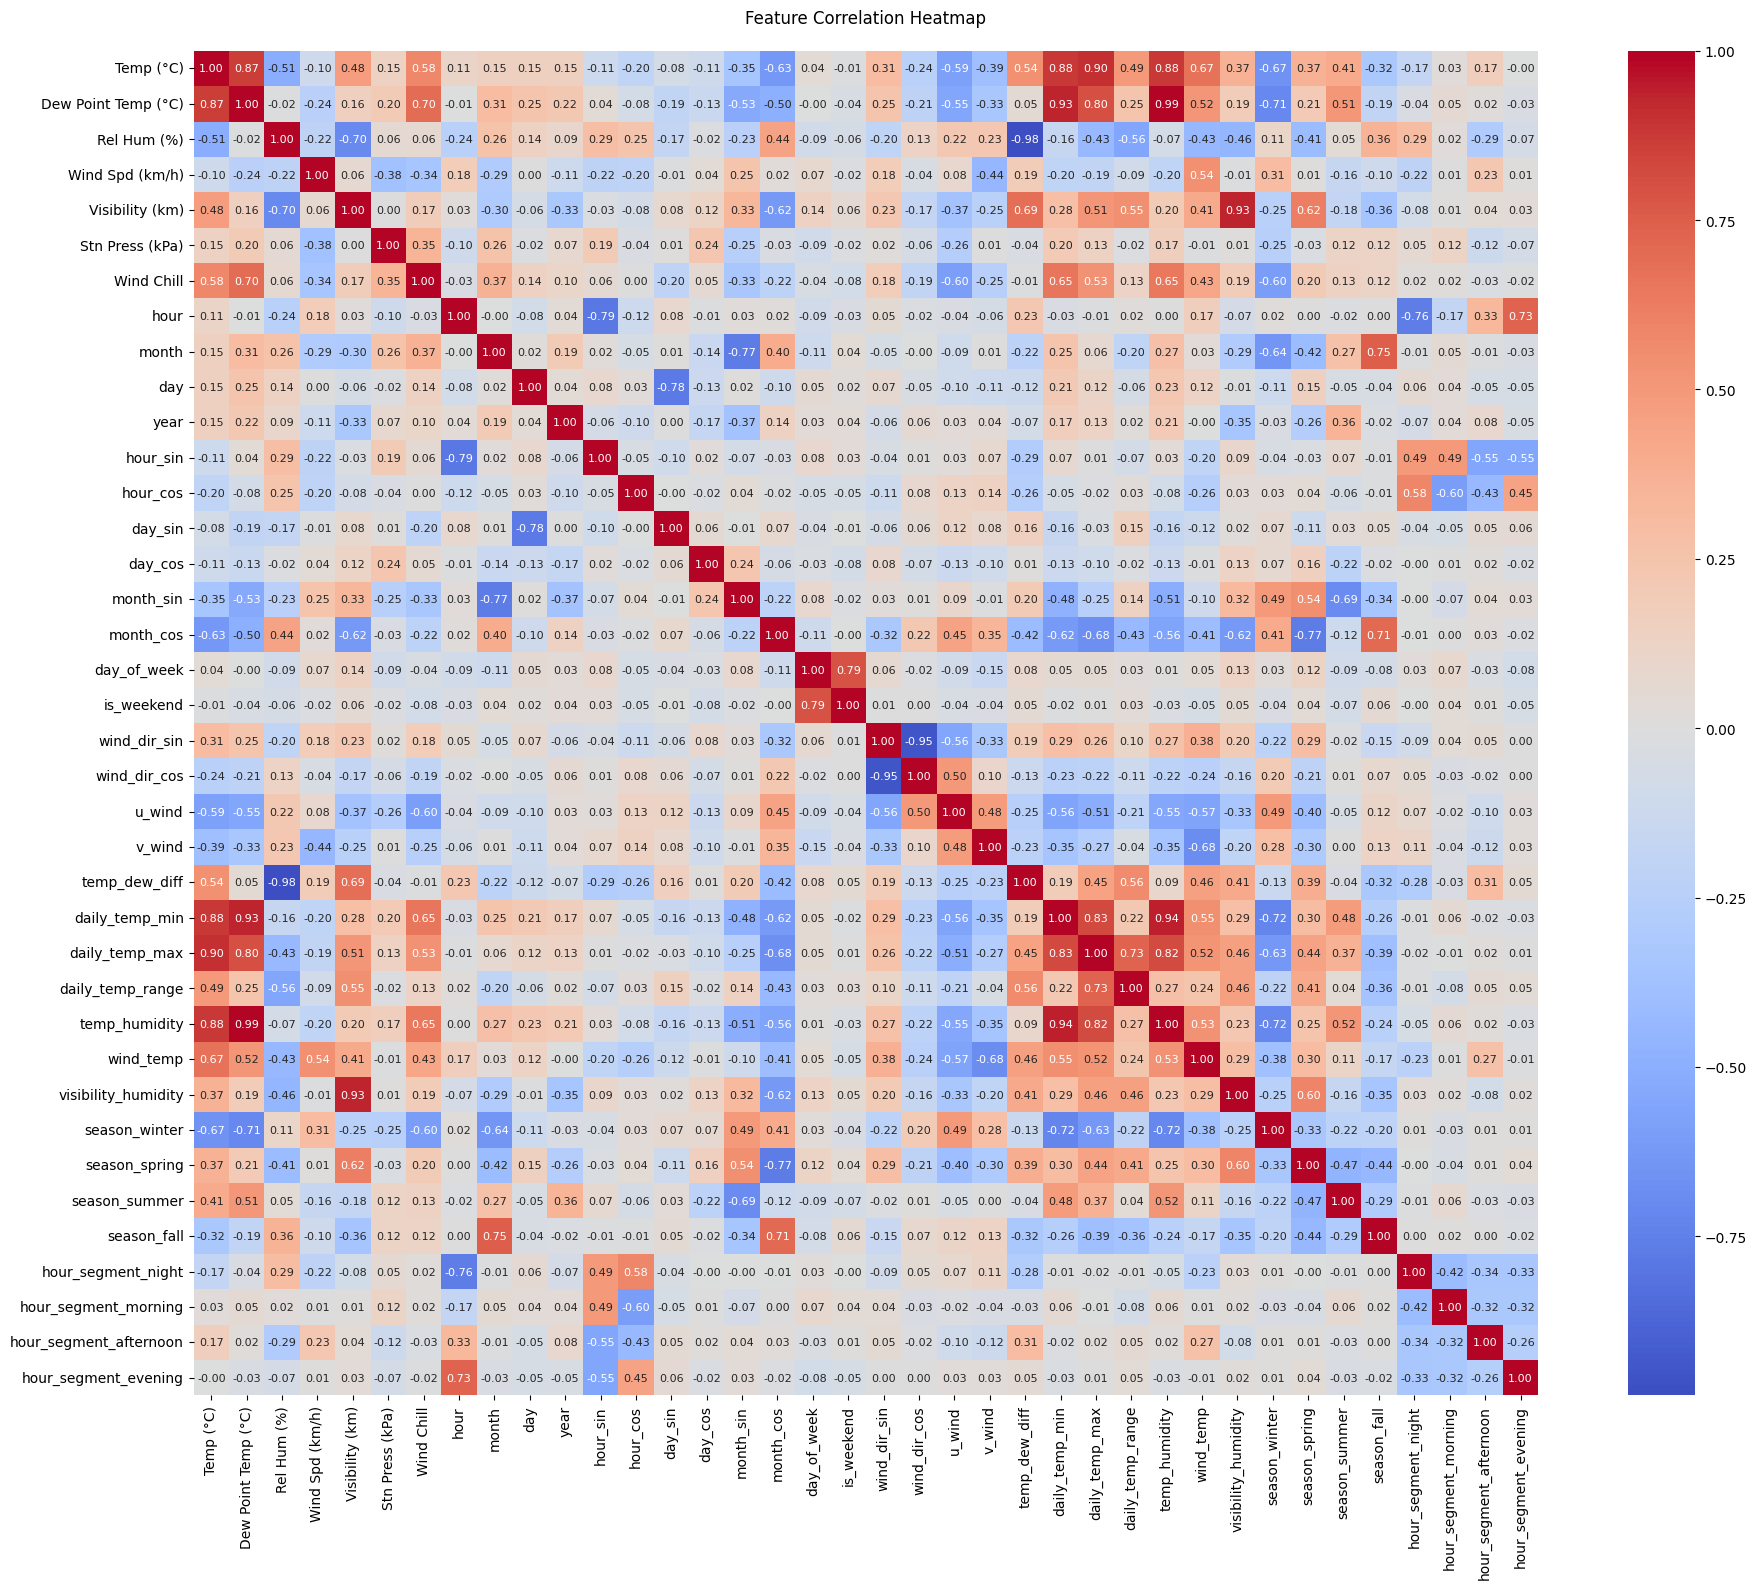


Highly correlated feature pairs (|correlation| > 0.8):
Temp (°C) & daily_temp_min: 0.882
Temp (°C) & daily_temp_max: 0.902
Temp (°C) & temp_humidity: 0.877
Dew Point Temp (°C) & Temp (°C): 0.866
Dew Point Temp (°C) & daily_temp_min: 0.934
Dew Point Temp (°C) & daily_temp_max: 0.801
Dew Point Temp (°C) & temp_humidity: 0.988
Rel Hum (%) & temp_dew_diff: 0.985
Visibility (km) & visibility_humidity: 0.931
wind_dir_cos & wind_dir_sin: 0.949
daily_temp_min & temp_humidity: 0.945
daily_temp_max & daily_temp_min: 0.829
daily_temp_max & temp_humidity: 0.819


In [ ]:
def create_features_correlation_heatmap(df, figsize=(20,16)):
    # Select only feature columns (exclude Weather)
    features = df.drop('Weather', axis=1)

    # Create figure
    plt.figure(figsize=figsize)

    # Create correlation heatmap for features only
    sns.heatmap(features.corr(),
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True,
                annot_kws={"size": 8})  # Reduce annotation font size

    plt.title('Feature Correlation Heatmap', pad=20)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    # Print highly correlated feature pairs (absolute correlation > 0.8)
    print("\nHighly correlated feature pairs (|correlation| > 0.8):")
    corr_matrix = features.corr().abs()

    # Get upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index pairs of high correlations
    high_corr_pairs = [(i, j, corr_matrix.loc[i,j])
                       for i in corr_matrix.index
                       for j in corr_matrix.columns
                       if corr_matrix.loc[i,j] > 0.8 and i < j]

    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} & {feat2}: {corr:.3f}")

# Ensure Weather is not included in correlation calculation
create_features_correlation_heatmap(processed_df)

In [ ]:
# Explode the DataFrame so that each weather type becomes its own row
df_exploded = df.explode('Weather')

# Remove leading/trailing spaces from the 'Weather' column
# df_exploded['Weather'] = df_exploded['Weather']

# One-hot encode the 'Weather' column
one_hot_encoded = pd.get_dummies(df_exploded['Weather']).astype(int)

# Combine the one-hot encoded columns back to the original DataFrame
df_combined = pd.concat([processed_df, one_hot_encoded], axis=1)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_combined.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Weather,hour,month,day,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,day_of_week,is_weekend,wind_dir_sin,wind_dir_cos,u_wind,v_wind,temp_dew_diff,daily_temp_min,daily_temp_max,daily_temp_range,temp_humidity,wind_temp,visibility_humidity,season_winter,season_spring,season_summer,season_fall,hour_segment_night,hour_segment_morning,hour_segment_afternoon,hour_segment_evening,Clear,Cloudy,Fog,Mainly Clear,Moderate Rain,"Moderate Rain,Fog",Mostly Cloudy,Rain,Rain Showers,"Rain Showers,Fog","Rain,Fog",Smoke,Snow
1,-0.349199,-1.584058,-2.200857,-1.402539,0.500805,0.419121,0.236077,Mostly Cloudy,1,5,1,2019,0.258819,0.965926,0.201299,0.97953,0.5,-0.866025,2,0,0.017452,0.999848,0.028685,0.216950,1.965504,8.2,16.2,0.727771,-0.923269,-0.913149,0.013452,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.455722,-1.421349,-1.801127,-1.402539,0.500805,0.371822,0.236077,Mostly Cloudy,4,5,1,2019,0.866025,0.500000,0.201299,0.97953,0.5,-0.866025,2,0,0.017452,0.999848,0.028685,0.216950,1.479237,8.2,16.2,0.727771,-0.896364,-0.913149,0.157481,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,-0.333982,-1.150168,-1.534640,-0.097518,2.089295,0.434887,0.236077,Mostly Cloudy,7,5,1,2019,0.965926,-0.258819,0.201299,0.97953,0.5,-0.866025,2,0,0.156434,0.987688,1.302518,0.216950,1.266496,8.2,16.2,0.727771,-0.723162,-0.199157,1.747980,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,0.411675,-1.186325,-2.733830,1.932515,2.089295,0.434887,0.236077,Mostly Cloudy,10,5,1,2019,0.500000,-0.866025,0.201299,0.97953,0.5,-0.866025,2,0,0.325568,0.945519,-0.536600,-2.210589,2.816469,8.2,16.2,0.727771,-0.610496,1.904918,0.882011,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13,0.761677,-1.529822,-3.466668,1.932515,2.089295,0.277225,0.236077,Mainly Clear,13,5,1,2019,-0.258819,-0.965926,0.201299,0.97953,0.5,-0.866025,2,0,0.374607,0.927184,-2.063814,-1.671340,4.092918,8.2,16.2,0.727771,-0.772348,2.371217,0.352807,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# **PreProcessing**

In [ ]:
print(df_combined.columns)

Index(['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)',
       'Stn Press (kPa)', 'Wind Chill', 'Weather', 'hour', 'month', 'day', 'year', 'hour_sin',
       'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'day_of_week', 'is_weekend',
       'wind_dir_sin', 'wind_dir_cos', 'u_wind', 'v_wind', 'temp_dew_diff', 'daily_temp_min',
       'daily_temp_max', 'daily_temp_range', 'temp_humidity', 'wind_temp', 'visibility_humidity',
       'season_winter', 'season_spring', 'season_summer', 'season_fall', 'hour_segment_night',
       'hour_segment_morning', 'hour_segment_afternoon', 'hour_segment_evening', 'Clear', 'Cloudy',
       'Fog', 'Mainly Clear', 'Moderate Rain', 'Moderate Rain,Fog', 'Mostly Cloudy', 'Rain',
       'Rain Showers', 'Rain Showers,Fog', 'Rain,Fog', 'Smoke', 'Snow'],
      dtype='object')


In [ ]:
# df = pd.read_csv('combined_weather_data3.csv')

In [ ]:
# List of weather columns exactly as they appear in your DataFrame
weather_columns = ['Clear', 'Cloudy', 'Fog', 'Rain', 'Rain,Fog', 'Rain Showers',
                   'Rain Showers,Fog', 'Snow', 'Smoke', 'Mostly Cloudy', 'Moderate Rain',
                   'Moderate Rain,Fog', 'Mainly Clear'
]

# Create y (target) DataFrame
y = df_combined[weather_columns].copy()

# Remove weather columns from original DataFrame
df_cleaned = df_combined.drop(columns=weather_columns)

In [ ]:
df_cleaned.drop(['Weather'],axis=1,inplace=True)
df_cleaned.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,hour,month,day,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,day_of_week,is_weekend,wind_dir_sin,wind_dir_cos,u_wind,v_wind,temp_dew_diff,daily_temp_min,daily_temp_max,daily_temp_range,temp_humidity,wind_temp,visibility_humidity,season_winter,season_spring,season_summer,season_fall,hour_segment_night,hour_segment_morning,hour_segment_afternoon,hour_segment_evening
1,-0.349199,-1.584058,-2.200857,-1.402539,0.500805,0.419121,0.236077,1,5,1,2019,0.258819,0.965926,0.201299,0.97953,0.5,-0.866025,2,0,0.017452,0.999848,0.028685,0.216950,1.965504,8.2,16.2,0.727771,-0.923269,-0.913149,0.013452,0,1,0,0,1,0,0,0
4,-0.455722,-1.421349,-1.801127,-1.402539,0.500805,0.371822,0.236077,4,5,1,2019,0.866025,0.500000,0.201299,0.97953,0.5,-0.866025,2,0,0.017452,0.999848,0.028685,0.216950,1.479237,8.2,16.2,0.727771,-0.896364,-0.913149,0.157481,0,1,0,0,1,0,0,0
7,-0.333982,-1.150168,-1.534640,-0.097518,2.089295,0.434887,0.236077,7,5,1,2019,0.965926,-0.258819,0.201299,0.97953,0.5,-0.866025,2,0,0.156434,0.987688,1.302518,0.216950,1.266496,8.2,16.2,0.727771,-0.723162,-0.199157,1.747980,0,1,0,0,0,1,0,0
10,0.411675,-1.186325,-2.733830,1.932515,2.089295,0.434887,0.236077,10,5,1,2019,0.500000,-0.866025,0.201299,0.97953,0.5,-0.866025,2,0,0.325568,0.945519,-0.536600,-2.210589,2.816469,8.2,16.2,0.727771,-0.610496,1.904918,0.882011,0,1,0,0,0,1,0,0
13,0.761677,-1.529822,-3.466668,1.932515,2.089295,0.277225,0.236077,13,5,1,2019,-0.258819,-0.965926,0.201299,0.97953,0.5,-0.866025,2,0,0.374607,0.927184,-2.063814,-1.671340,4.092918,8.2,16.2,0.727771,-0.772348,2.371217,0.352807,0,1,0,0,0,0,1,0


In [ ]:
df_cleaned.drop(['year','is_weekend','day_of_week','day','hour_segment_night','hour_segment_morning','hour_segment_afternoon','hour_segment_evening','Dew Point Temp (°C)','Rel Hum (%)','season_winter','season_spring','season_summer','season_fall','wind_dir_cos','u_wind','v_wind','daily_temp_range','visibility_humidity','daily_temp_min','daily_temp_max','temp_humidity','visibility_humidity','hour_sin','hour_cos','day_sin','day_cos','month_sin','month_cos','temp_dew_diff','wind_temp','Stn Press (kPa)','wind_dir_sin'],axis=1,inplace=True)
print(df_cleaned.shape)
df_cleaned.head()

(910, 6)


,Temp (°C),Wind Spd (km/h),Visibility (km),Wind Chill,hour,month
1,-0.349199,-1.402539,0.500805,0.236077,1,5
4,-0.455722,-1.402539,0.500805,0.236077,4,5
7,-0.333982,-0.097518,2.089295,0.236077,7,5
10,0.411675,1.932515,2.089295,0.236077,10,5
13,0.761677,1.932515,2.089295,0.236077,13,5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Temp (°C),Wind Spd (km/h),Visibility (km),Wind Chill,hour,month
253,2.192121,-0.242520,2.089295,0.236077,13,5
31,-0.303547,1.642510,0.500805,0.236077,7,5
5396,-0.866594,0.482491,-0.339388,0.236077,20,12
706,0.989939,-0.967532,-0.024316,0.236077,10,5
14100,-0.562244,1.062501,-0.818561,0.236077,12,12


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train.head()

(728, 6)
(182, 6)
(728, 13)
(182, 13)


,Clear,Cloudy,Fog,Rain,"Rain,Fog",Rain Showers,"Rain Showers,Fog",Snow,Smoke,Mostly Cloudy,Moderate Rain,"Moderate Rain,Fog",Mainly Clear
253,0,0,0,0,0,0,0,0,0,1,0,0,0
31,0,0,0,0,0,1,0,0,0,0,0,0,0
5396,0,0,0,0,0,0,0,0,0,0,1,0,0
706,0,0,0,0,0,0,0,0,0,0,0,0,1
14100,0,0,0,0,0,0,1,0,0,0,0,0,0


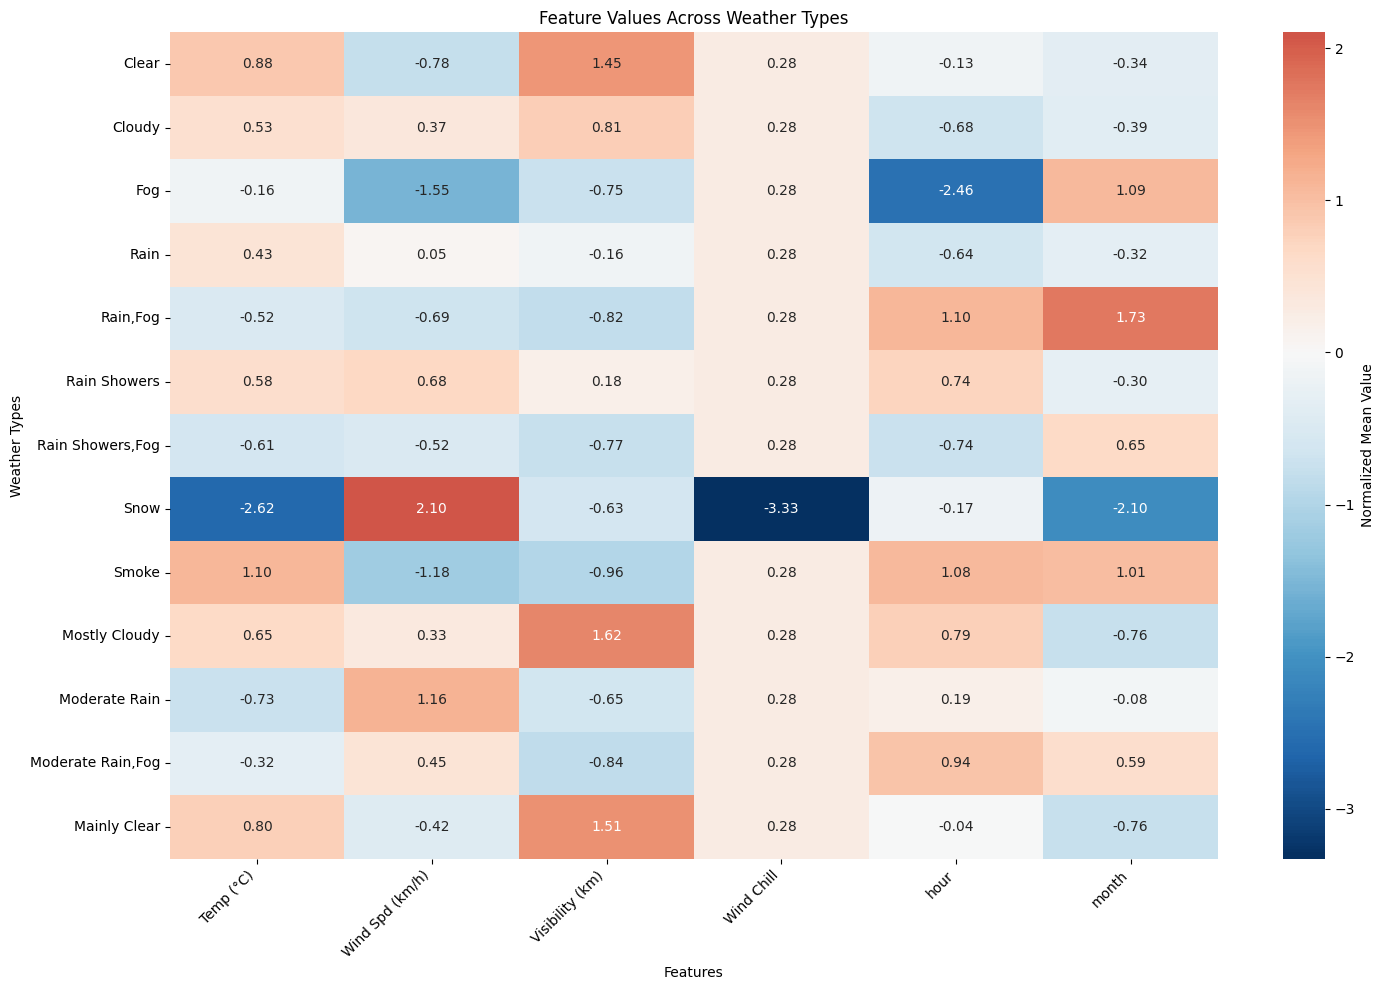

In [ ]:
def create_weather_feature_heatmap(X, y, feature_names, weather_types):
    """
    Create a heatmap showing the relationship between features and weather types

    Parameters:
    X: pandas DataFrame or NumPy array containing feature values
    y: pandas DataFrame containing one-hot encoded weather labels
    feature_names: list of feature names to include in the heatmap
    weather_types: list of weather type names
    """
    # Check if X is a DataFrame or a NumPy array
    if isinstance(X, pd.DataFrame):
        feature_data = X[feature_names].copy()
    elif isinstance(X, np.ndarray):
        # Convert NumPy array to DataFrame with feature names as columns
        feature_data = pd.DataFrame(X, columns=feature_names)
    else:
        raise ValueError("X must be a pandas DataFrame or a NumPy array")

    # Convert one-hot encoded y to class labels
    y_labels = y.idxmax(axis=1)

    # Add weather_type column
    feature_data['weather_type'] = y_labels

    # Calculate mean feature values for each weather type
    means = []
    for weather in weather_types:
        weather_data = feature_data[feature_data['weather_type'] == weather]
        means.append(weather_data[feature_names].mean().values)

    # Create mean value matrix
    mean_matrix = pd.DataFrame(
        means,
        columns=feature_names,
        index=weather_types
    )

    # Normalize the mean values for better visualization
    normalized_matrix = (mean_matrix - mean_matrix.mean()) / mean_matrix.std()

    # Create heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(normalized_matrix,
                cmap='RdBu_r',
                center=0,
                annot=True,
                fmt='.2f',
                cbar_kws={'label': 'Normalized Mean Value'},
                xticklabels=feature_names,
                yticklabels=weather_types)

    plt.title('Feature Values Across Weather Types')
    plt.xlabel('Features')
    plt.ylabel('Weather Types')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return plt.gcf()


# Ensure feature_names and weather_types match your data
feature_names = [
    'Temp (°C)', 'Wind Spd (km/h)', 'Visibility (km)',
    'Wind Chill', 'hour', 'month'
]

weather_types = [
    'Clear', 'Cloudy', 'Fog', 'Rain', 'Rain,Fog', 'Rain Showers', 'Rain Showers,Fog',
    'Snow', 'Smoke', 'Mostly Cloudy', 'Moderate Rain', 'Moderate Rain,Fog', 'Mainly Clear'
]

heatmap = create_weather_feature_heatmap(X_train, y_train, feature_names, weather_types)
plt.show()


In [ ]:
# X_train.drop(['Hour','Month','Day','Year'],axis=1,inplace=True)
# X_train.head()

In [ ]:
# X_test.drop(['Hour','Month','Day','Year'],axis=1,inplace=True)
# X_test.head()

# **NN**

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os

seed_value=20
# Comprehensive seed setting for reproducibility
def set_seeds(seed_value):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

    # Enable deterministic operations in TensorFlow
    tf.config.experimental.enable_op_determinism()

    # Set session-level seeds
    tf.keras.utils.set_random_seed(seed_value)

    # Configure threading for determinism
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set all seeds
set_seeds(seed_value)

# Create the model with regularization
model = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Flatten(),
    # Add dropout after input
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,
                         activation='swish',
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01),
                         bias_initializer=tf.keras.initializers.Zeros()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,
                         activation='swish',
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01),
                         bias_initializer=tf.keras.initializers.Zeros()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(13,
                         activation='softmax',
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         bias_initializer=tf.keras.initializers.Zeros())
])

# Compile the model with reduced learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Reduced learning rate
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        tf.keras.metrics.Precision(name='precision', top_k=1),
        tf.keras.metrics.Recall(name='recall', top_k=1)
    ]
)

# Add early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)

# Train the model with early stopping
model_history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    shuffle=True
)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - categorical_accuracy: 0.0702 - loss: 4.7472 - precision: 0.0702 - recall: 0.0702 - val_categorical_accuracy: 0.0685 - val_loss: 3.9785 - val_precision: 0.0685 - val_recall: 0.0685
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.1419 - loss: 4.1749 - precision: 0.1419 - recall: 0.1419 - val_categorical_accuracy: 0.1575 - val_loss: 3.7250 - val_precision: 0.1575 - val_recall: 0.1575
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - categorical_accuracy: 0.1571 - loss: 3.9702 - precision: 0.1571 - recall: 0.1571 - val_categorical_accuracy: 0.1781 - val_loss: 3.5865 - val_precision: 0.1781 - val_recall: 0.1781
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.2539 - loss: 3.6180 - precision: 0.2539 - recall: 0.2539 - val_categorical_accuracy: 0.2740 - val_loss: 3.5005 - val_precision: 0.2740 - val_recall: 0.2740
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.

=== Dataset Size ===
Number of samples: 6666
Number of features: 27


=== Class Distribution ===
       Class  Count  Percentage
23  Class_24   1429       21.44
24  Class_25    890       13.35
2    Class_2    789       11.84
14  Class_14    785       11.78
25  Class_26    684       10.26
1    Class_1    677       10.16
33  Class_34    312        4.68
5    Class_5    309        4.64
19  Class_19    107        1.61
39  Class_40    105        1.58
15  Class_15     97        1.46
37  Class_38     80        1.20
26  Class_27     60        0.90
4    Class_4     51        0.77
6    Class_6     39        0.59
16  Class_16     38        0.57
38  Class_39     31        0.47
35  Class_36     30        0.45
7    Class_7     16        0.24
3    Class_3     15        0.23
32  Class_33     13        0.20
0    Class_0     12        0.18
10  Class_10     12        0.18
44  Class_45     11        0.17
42  Class_43     11        0.17
45  Class_46      9        0.14
20  Class_21      8        0.12
11  Cla

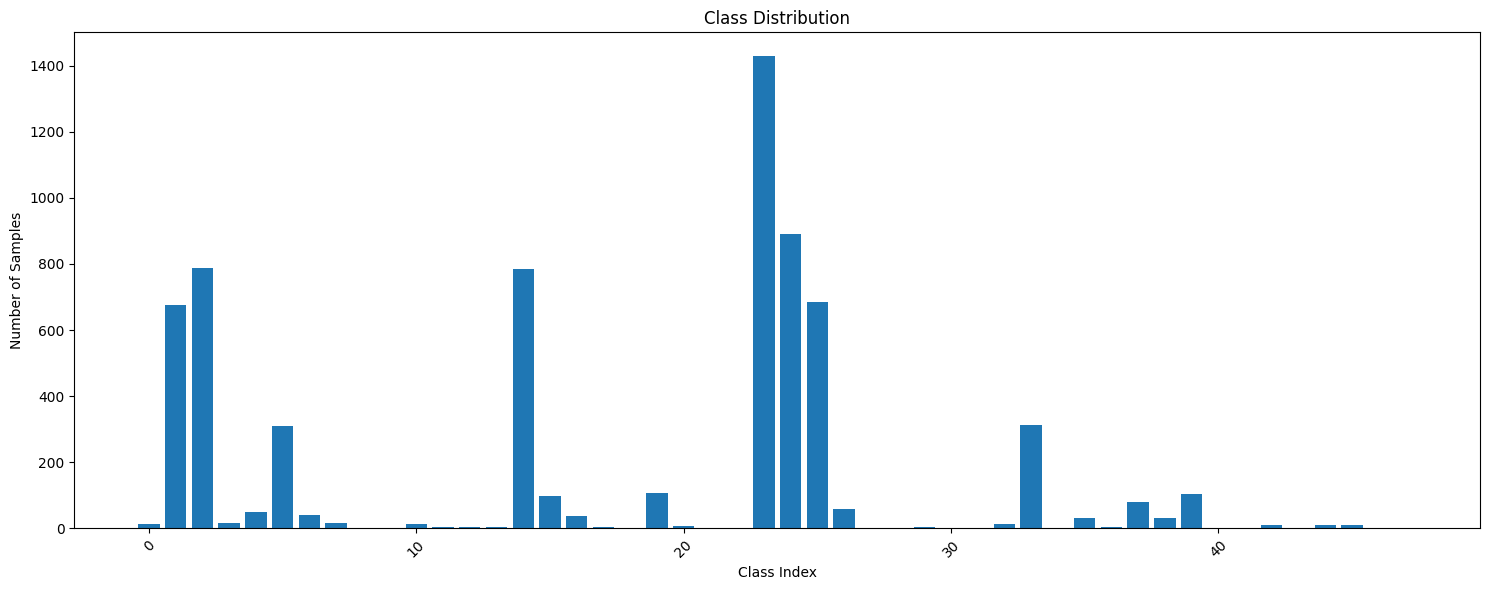

=== Feature Statistics ===
                        Feature       Mean       Std        Min        Max   Zeros(%)
Temp (°C)             Feature_0  -0.007876  1.003332  -3.230109   3.632002   0.000000
Dew Point Temp (°C)   Feature_1  -0.005830  0.997185  -4.201765   2.513568   0.000000
Rel Hum (%)           Feature_2   0.003587  0.994801  -3.774254   1.086059   0.000000
Wind Spd (km/h)       Feature_3   0.006547  1.002587  -1.332764   6.452447   0.000000
Stn Press (kPa)       Feature_4  -0.005262  1.004542  -4.212799   2.972755   0.000000
Wind Chill            Feature_5  -0.001589  0.997477  -9.590834   0.184795   0.000000
hour_sin              Feature_6   0.025109  0.709625  -1.000000   1.000000   1.740174
hour_cos              Feature_7   0.000934  0.704238  -1.000000   1.000000   0.000000
day_sin               Feature_8   0.013103  0.709025  -0.998717   0.998717   0.000000
day_cos               Feature_9  -0.045779  0.703680  -0.994869   1.000000   0.000000
month_sin            Featur

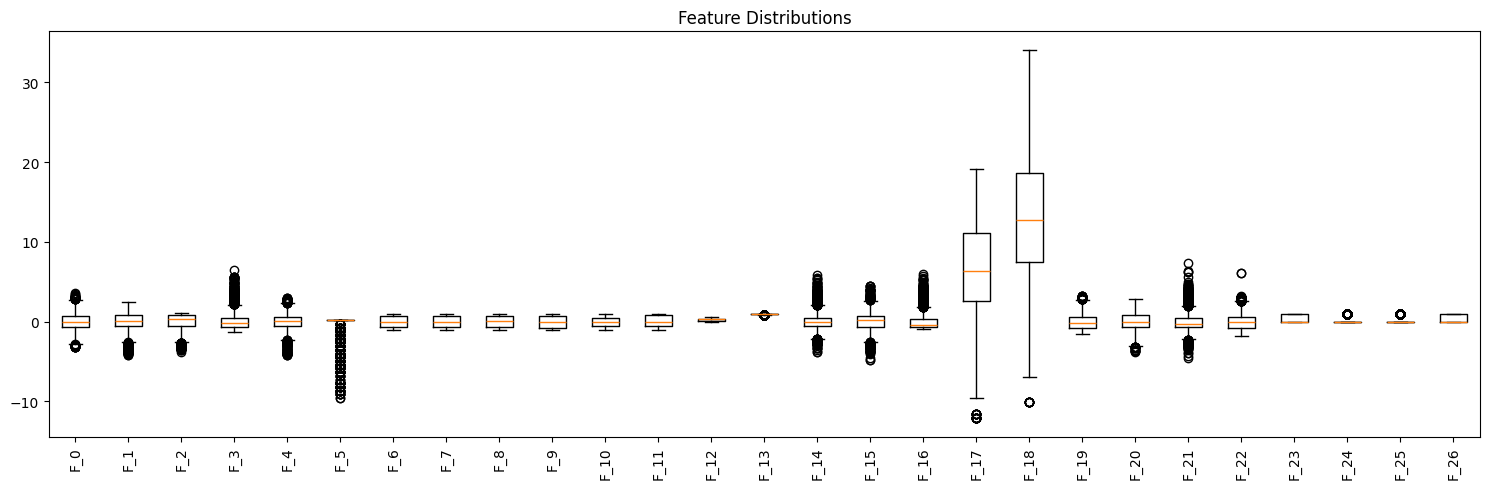

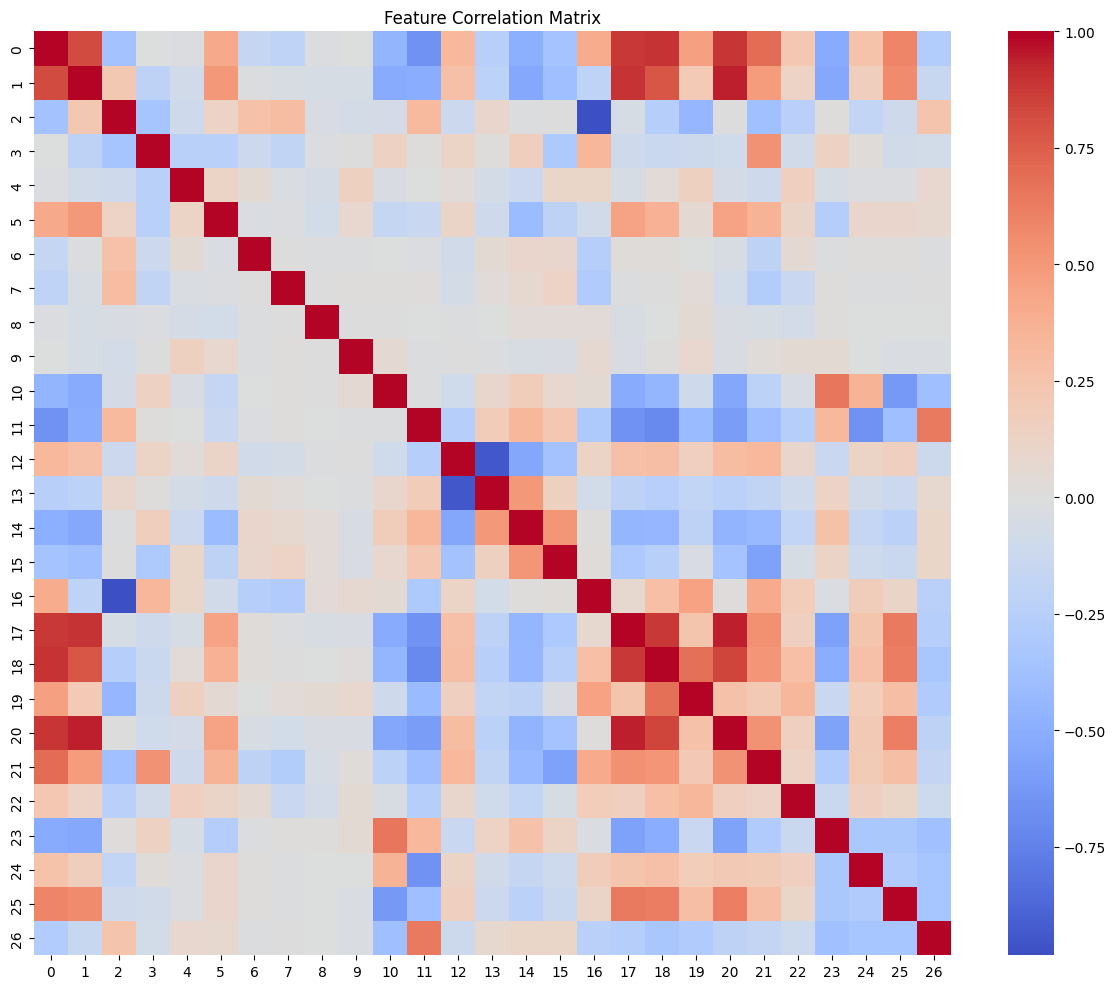

In [ ]:
def analyze_dataset(X_train, y_train, feature_names=None, class_names=None):
    """
    Comprehensive dataset analysis
    """
    print("=== Dataset Size ===")
    print(f"Number of samples: {X_train.shape[0]}")
    print(f"Number of features: {X_train.shape[1]}")
    print("\n")

    # Class distribution
    print("=== Class Distribution ===")
    # Convert one-hot encoded y_train back to class indices
    if len(y_train.shape) > 1:  # If one-hot encoded
        y_indices = np.argmax(y_train, axis=1)
    else:
        y_indices = y_train

    unique_classes, class_counts = np.unique(y_indices, return_counts=True)
    class_distribution = pd.DataFrame({
        'Class': [class_names[i] if class_names is not None else f'Class_{i}' for i in unique_classes],
        'Count': class_counts,
        'Percentage': (class_counts / len(y_indices) * 100).round(2)
    }).sort_values('Count', ascending=False)

    print(class_distribution)
    print("\n")

    # Plot class distribution
    plt.figure(figsize=(15, 6))
    plt.bar(range(len(class_counts)), class_counts)
    plt.title('Class Distribution')
    plt.xlabel('Class Index')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Feature statistics
    print("=== Feature Statistics ===")
    feature_stats = pd.DataFrame({
        'Feature': feature_names if feature_names is not None else [f'Feature_{i}' for i in range(X_train.shape[1])],
        'Mean': X_train.mean(axis=0),
        'Std': X_train.std(axis=0),
        'Min': X_train.min(axis=0),
        'Max': X_train.max(axis=0),
        'Zeros(%)': (X_train == 0).mean(axis=0) * 100
    })
    print(feature_stats)
    print("\n")

    # Plot feature distributions
    plt.figure(figsize=(15, 5))
    plt.boxplot(X_train, labels=feature_names if feature_names is not None else [f'F_{i}' for i in range(X_train.shape[1])])
    plt.title('Feature Distributions')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(12, 10))
    correlation_matrix = np.corrcoef(X_train.T)
    sns.heatmap(correlation_matrix,
                cmap='coolwarm',
                center=0,
                xticklabels=feature_names if feature_names is not None else range(X_train.shape[1]),
                yticklabels=feature_names if feature_names is not None else range(X_train.shape[1]))
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

    return class_distribution, feature_stats

# If you have feature names and class names, create lists for them
# Example:
# feature_names = ['temperature', 'humidity', 'pressure', ...] # Add your 27 feature names
# class_names = ['sunny', 'rainy', 'cloudy', ...] # Add your 49 class names

# Run the analysis
class_dist, feat_stats = analyze_dataset(X_train, y_train)  # Add feature_names and class_names if available

=== Dataset Size ===
Total number of samples: 6666
Number of features: 27


=== Class Distribution ===
         Class  Count  Percentage
23  Weather_24   1429       21.44
24  Weather_25    890       13.35
2    Weather_2    789       11.84
14  Weather_14    785       11.78
25  Weather_26    684       10.26
1    Weather_1    677       10.16
33  Weather_34    312        4.68
5    Weather_5    309        4.64
19  Weather_19    107        1.61
39  Weather_40    105        1.58
15  Weather_15     97        1.46
37  Weather_38     80        1.20
26  Weather_27     60        0.90
4    Weather_4     51        0.77
6    Weather_6     39        0.59
16  Weather_16     38        0.57
38  Weather_39     31        0.47
35  Weather_36     30        0.45
7    Weather_7     16        0.24
3    Weather_3     15        0.23
32  Weather_33     13        0.20
0    Weather_0     12        0.18
10  Weather_10     12        0.18
44  Weather_45     11        0.17
42  Weather_43     11        0.17
45  Weather_4

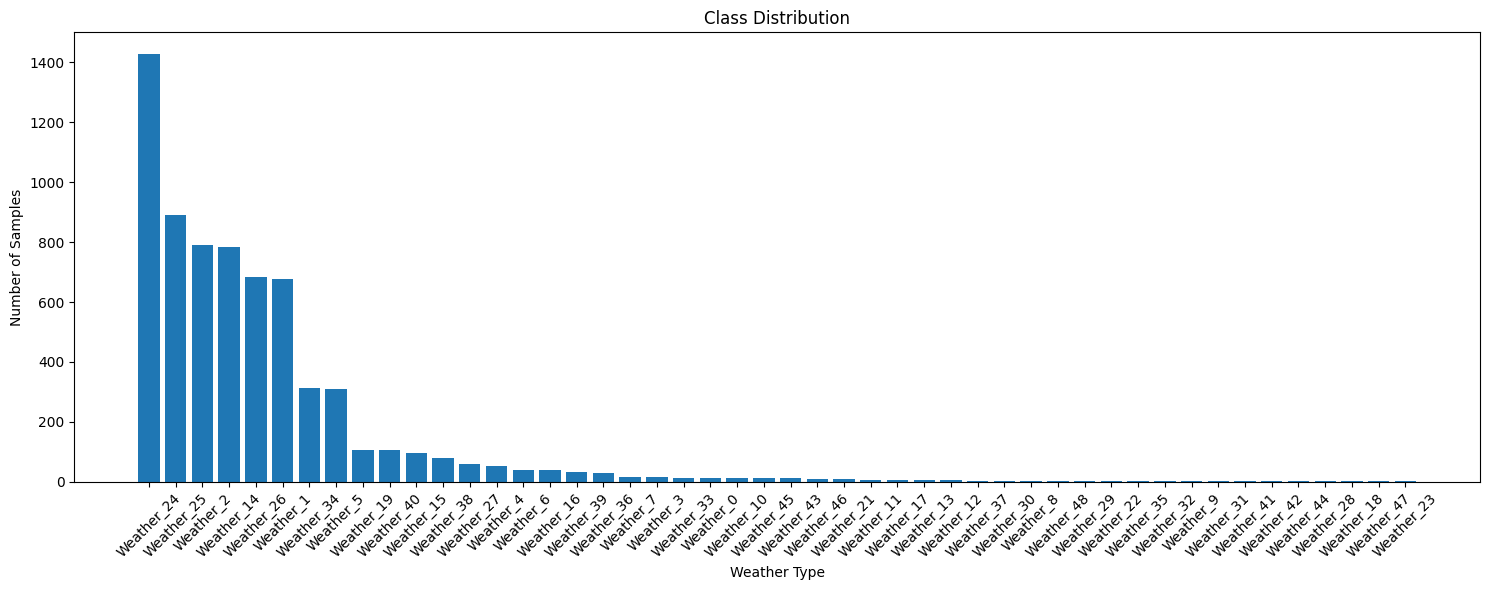


=== Class Balance Statistics ===
Most common class: 21.44%
Least common class: 0.02%
Mean class percentage: 2.09%
Std of class distribution: 4.55%
Imbalance ratio (most common / least common): 1072.00


In [ ]:
def analyze_data_and_predictions(X_train, y_train, model=None):
    """
    Analyze dataset distribution and model predictions
    """
    # 1. Dataset Size
    print("=== Dataset Size ===")
    print(f"Total number of samples: {X_train.shape[0]}")
    print(f"Number of features: {X_train.shape[1]}")
    print("\n")

    # 2. Class Distribution
    print("=== Class Distribution ===")
    # Convert one-hot encoded labels back to class indices
    if len(y_train.shape) > 1:  # If one-hot encoded
        y_indices = np.argmax(y_train, axis=1)
    else:
        y_indices = y_train

    unique_classes, class_counts = np.unique(y_indices, return_counts=True)

    # Create distribution DataFrame
    distribution_df = pd.DataFrame({
        'Class': [f'Weather_{i}' for i in unique_classes],
        'Count': class_counts,
        'Percentage': (class_counts / len(y_indices) * 100).round(2)
    }).sort_values('Count', ascending=False)

    print(distribution_df)
    print("\n")

    # Plot class distribution
    plt.figure(figsize=(15, 6))
    plt.bar(distribution_df['Class'], distribution_df['Count'])
    plt.title('Class Distribution')
    plt.xlabel('Weather Type')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    if model is not None:
        # 3. Model Performance Analysis
        print("=== Model Performance Analysis ===")

        # Make predictions
        y_pred = model.predict(X_train)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Compute confusion matrix
        cm = confusion_matrix(y_indices, y_pred_classes)

        # Calculate per-class accuracy
        per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

        # Create performance DataFrame
        performance_df = pd.DataFrame({
            'Class': [f'Weather_{i}' for i in unique_classes],
            'Samples': class_counts,
            'Accuracy': per_class_accuracy * 100
        }).sort_values('Accuracy')

        print("\nHardest Classes to Predict (Lowest Accuracy):")
        print(performance_df.head(10))
        print("\nEasiest Classes to Predict (Highest Accuracy):")
        print(performance_df.tail(10))

        # Plot confusion matrix
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.tight_layout()
        plt.show()

        return distribution_df, performance_df

    return distribution_df

# Run the analysis
# For just dataset analysis:
distribution_df = analyze_data_and_predictions(X_train, y_train)

# For full analysis including model performance:
# distribution_df, performance_df = analyze_data_and_predictions(X_train, y_train, model)

# Print additional statistics
print("\n=== Class Balance Statistics ===")
class_percentages = distribution_df['Percentage']
print(f"Most common class: {class_percentages.max():.2f}%")
print(f"Least common class: {class_percentages.min():.2f}%")
print(f"Mean class percentage: {class_percentages.mean():.2f}%")
print(f"Std of class distribution: {class_percentages.std():.2f}%")

# Calculate imbalance ratio
imbalance_ratio = class_percentages.max() / class_percentages.min()
print(f"Imbalance ratio (most common / least common): {imbalance_ratio:.2f}")

# **New NN**

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - categorical_accuracy: 0.0917 - loss: 4.2767 - precision: 0.0917 - recall: 0.0917 - val_categorical_accuracy: 0.0753 - val_loss: 3.9920 - val_precision: 0.0753 - val_recall: 0.0753
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.1123 - loss: 4.1174 - precision: 0.1123 - recall: 0.1123 - val_categorical_accuracy: 0.1233 - val_loss: 3.8673 - val_precision: 0.1233 - val_recall: 0.1233
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.1401 - loss: 3.9094 - precision: 0.1401 - recall: 0.1401 - val_categorical_accuracy: 0.1644 - val_loss: 3.7738 - val_precision: 0.1644 - val_recall: 0.1644
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.1620 - loss: 3.8258 - precision: 0.1620 - recall: 0.1620 - val_categorical_accuracy: 0.2534 - val_loss: 3.6923 - val_precision: 0.2534 - val_recall: 0.2534
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accurac

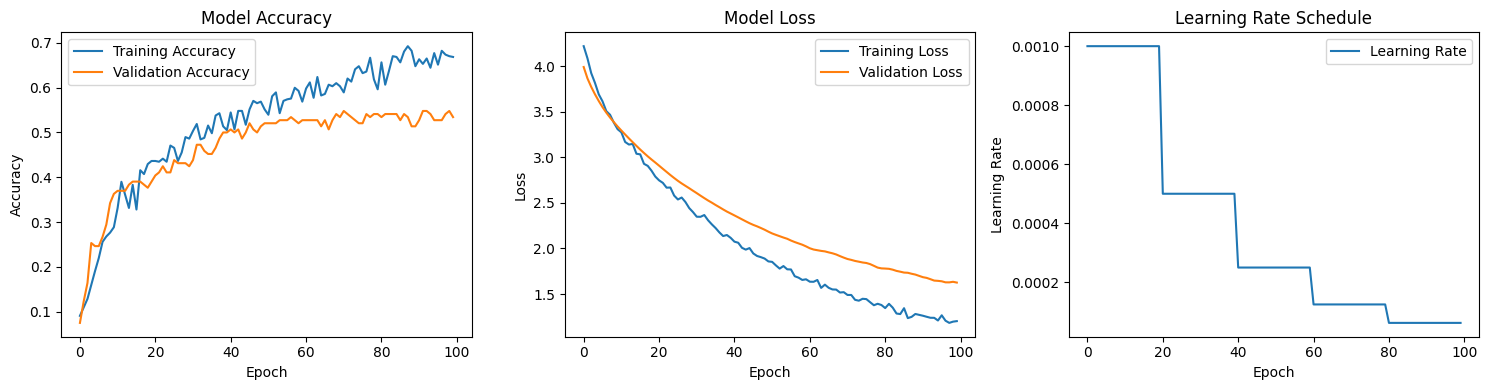

In [ ]:
# Set random seeds for reproducibility
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)
tf.config.experimental.enable_op_determinism()

# Create the regularized model
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Flatten(),

    # Add BatchNormalization at the start
    tf.keras.layers.BatchNormalization(),

    # First dense layer with regularization
    tf.keras.layers.Dense(64,
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('swish'),
    tf.keras.layers.Dropout(0.3),

    # Second dense layer with regularization
    tf.keras.layers.Dense(64,
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('swish'),
    tf.keras.layers.Dropout(0.3),

    # Third dense layer with regularization
    tf.keras.layers.Dense(26,
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('swish'),
    tf.keras.layers.Dropout(0.3),

    # Output layer
    tf.keras.layers.Dense(13, activation='softmax',
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value))
])


# Compile the model
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        tf.keras.metrics.Precision(name='precision', top_k=1),
        tf.keras.metrics.Recall(name='recall', top_k=1)
    ]
)

# Train the model
model2_history = model2.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2
)

# Plot the training history
plt.figure(figsize=(15,4))

# Plot accuracy
plt.subplot(1,3,1)
plt.plot(model2_history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(model2_history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,3,2)
plt.plot(model2_history.history['loss'], label='Training Loss')
plt.plot(model2_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot learning rate
plt.subplot(1,3,3)
plt.plot([step_decay(epoch) for epoch in range(len(model2_history.history['loss']))], label='Learning Rate')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Ensure X_train is a numpy array with the right shape
X_train = np.array(X_train)
y_train = np.array(y_train)

# Ensure X_test is a numpy array with the right shape
X_test = np.array(X_test)
y_test = np.array(y_test)
# Create normalizer with explicit input shape
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(tf.cast(X_train, tf.float32))

# Simpler model with batch normalization
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(6,)),  # Explicit input shape
    normalizer,
    tf.keras.layers.Dense(
        64,  # Reduced number of neurons
        activation='selu',  # Changed to ReLU
        kernel_initializer=tf.keras.initializers.HeNormal(seed=seed_value)
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(
        26,  # Smaller intermediate layer
        activation='swish',
        kernel_initializer=tf.keras.initializers.HeNormal(seed=seed_value)
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(
        13,
        activation='softmax',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)
    )
])

# Compile with adjusted learning rate and optimizer settings
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        tf.keras.metrics.Precision(name='precision', top_k=1),
        tf.keras.metrics.Recall(name='recall', top_k=1)
    ]
)

# Add callbacks
callbacks = [
    # tf.keras.callbacks.EarlyStopping(
    #     monitor='val_loss',
    #     patience=20,
    #     restore_best_weights=True,
    #     min_delta=0.001
    # ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        min_delta=0.001
    )
]

# Train the model
model_train = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=32,
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.0970 - loss: 3.1396 - precision: 0.0970 - recall: 0.0970 - val_categorical_accuracy: 0.1644 - val_loss: 2.8172 - val_precision: 0.1644 - val_recall: 0.1644 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.1734 - loss: 2.4943 - precision: 0.1734 - recall: 0.1734 - val_categorical_accuracy: 0.2466 - val_loss: 2.3422 - val_precision: 0.2466 - val_recall: 0.2466 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2884 - loss: 2.1529 - precision: 0.2884 - recall: 0.2884 - val_categorical_accuracy: 0.3288 - val_loss: 2.0771 - val_precision: 0.3288 - val_recall: 0.3288 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3375 - loss: 1.9798 - precision: 0.3375 - recall: 0.3375 - val_categorical_accuracy: 0.3425 - val_loss: 1.9423 - val_precision: 0.3425 - val_recall: 0.

In [ ]:
# Evaluate on test set
test_results = model.evaluate(X_test, y_test, verbose=1)
print("\nTest set results:")
for metric_name, value in zip(model.metrics_names, test_results):
    print(f"{metric_name}: {value:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_train.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(model_train.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_train.history['loss'], label='Training Loss')
plt.plot(model_train.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - categorical_accuracy: 0.0926 - loss: 6.3492 - precision: 0.0926 - recall: 0.0926 - val_categorical_accuracy: 0.1849 - val_loss: 5.8254 - val_precision: 0.1849 - val_recall: 0.1849 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - categorical_accuracy: 0.2415 - loss: 5.7084 - precision: 0.2415 - recall: 0.2415 - val_categorical_accuracy: 0.3082 - val_loss: 5.6460 - val_precision: 0.3082 - val_recall: 0.3082 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.3863 - loss: 5.1913 - precision: 0.3863 - recall: 0.3863 - val_categorical_accuracy: 0.3630 - val_loss: 5.4861 - val_precision: 0.3630 - val_recall: 0.3630 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting le

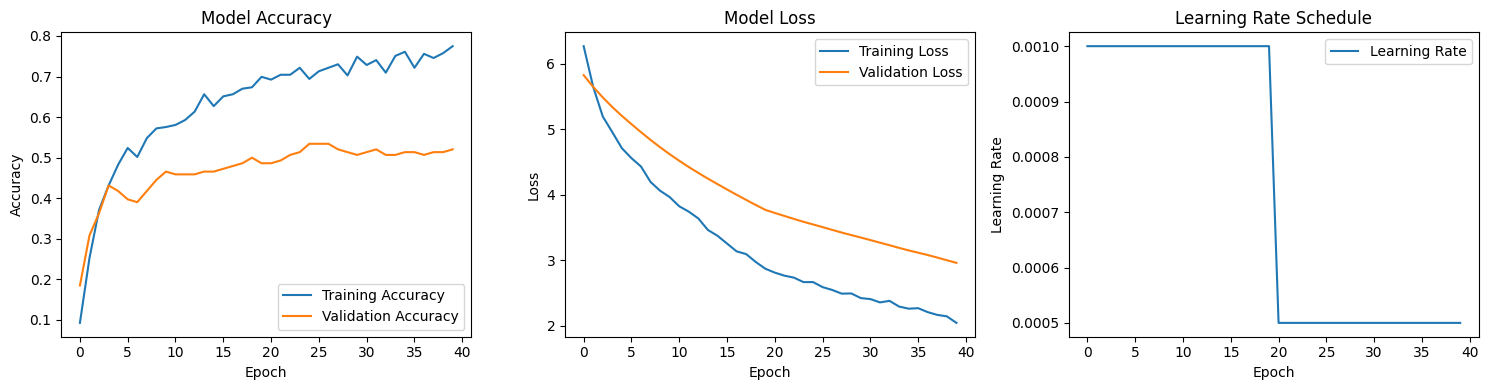

In [ ]:
# Set random seeds for reproducibility
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)
tf.config.experimental.enable_op_determinism()

# Create the regularized model
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(27,)),
    tf.keras.layers.Flatten(),

    # Add BatchNormalization at the start
    tf.keras.layers.BatchNormalization(),

    # First dense layer with regularization
    tf.keras.layers.Dense(128,
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('swish'),
    tf.keras.layers.Dropout(0.3),

    # Second dense layer with regularization
    tf.keras.layers.Dense(64,
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('swish'),
    tf.keras.layers.Dropout(0.3),

    # Third dense layer with regularization
    tf.keras.layers.Dense(26,
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('swish'),
    tf.keras.layers.Dropout(0.3),

    # Output layer
    tf.keras.layers.Dense(13, activation='softmax',
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value))
])

# Define learning rate schedule
def step_decay(epoch):
    initial_lr = 0.001
    drop_factor = 0.5
    epochs_per_drop = 20
    lr = initial_lr * (drop_factor ** (epoch // epochs_per_drop))
    return lr

# Create scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Compile the model
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        tf.keras.metrics.Precision(name='precision', top_k=1),
        tf.keras.metrics.Recall(name='recall', top_k=1)
    ]
)

# Train the model
model2_history = model2.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=128,
    validation_split=0.2,
    callbacks=[lr_scheduler]
)

# Plot the training history
plt.figure(figsize=(15,4))

# Plot accuracy
plt.subplot(1,3,1)
plt.plot(model2_history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(model2_history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,3,2)
plt.plot(model2_history.history['loss'], label='Training Loss')
plt.plot(model2_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot learning rate
plt.subplot(1,3,3)
plt.plot([step_decay(epoch) for epoch in range(len(model2_history.history['loss']))], label='Learning Rate')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.1895 - loss: 2.9472 - precision: 0.1895 - recall: 0.1895
Epoch 1
Current learning rate: 0.001000
Training accuracy: 0.2526
Validation accuracy: 0.3006
Accuracy gap: -0.0480
Waiting for epoch 10 before starting monitoring
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - categorical_accuracy: 0.1938 - loss: 2.9140 - precision: 0.1938 - recall: 0.1938 - val_categorical_accuracy: 0.3006 - val_loss: 2.0685 - val_precision: 0.3006 - val_recall: 0.3006
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.3308 - loss: 1.9867 - precision: 0.3308 - recall: 0.3308
Epoch 2
Current learning rate: 0.001000
Training accuracy: 0.3460
Validation accuracy: 0.3388
Accuracy gap: 0.0072
Waiting for epoch 10 before starting monitoring
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.3312 - loss: 1.9849 - precision: 0.3312 - recall: 0.3312 - val_categorical_accuracy: 0.3388 - val_loss: 1.8462 - val_pr

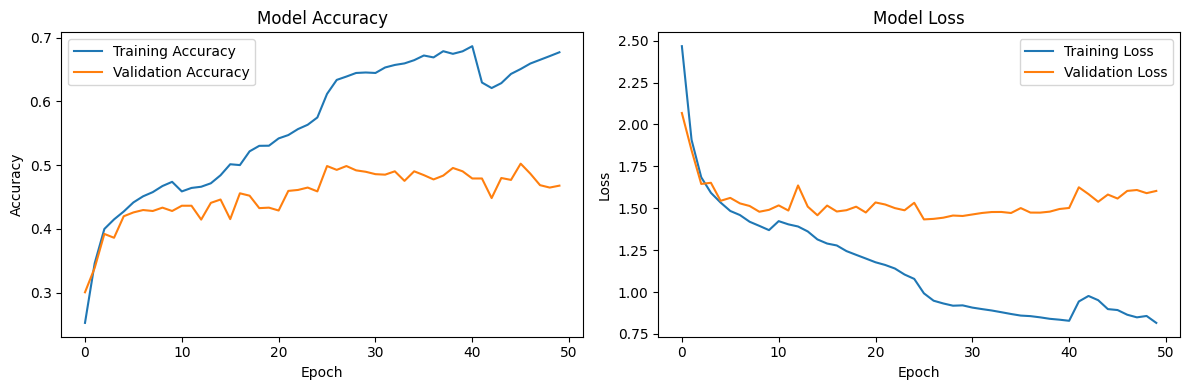

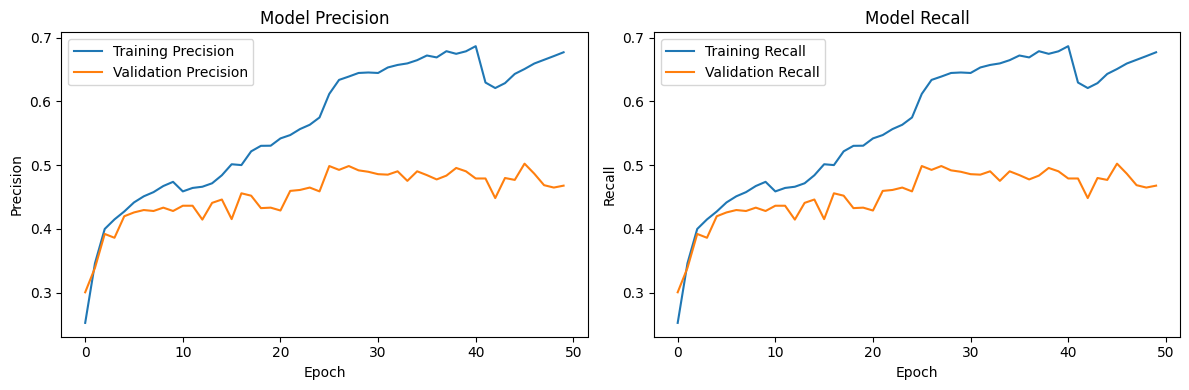

In [ ]:
class DynamicLRCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.high_lr_epochs_remaining = 0
        self.is_in_high_lr_mode = False
        self.cooldown_epochs_remaining = 0
        self.start_monitoring_epoch = 10  # Start monitoring after epoch 15

    def on_epoch_end(self, epoch, logs=None):
        # Get current training and validation metrics
        train_acc = logs.get('categorical_accuracy')
        val_acc = logs.get('val_categorical_accuracy')

        # Get current learning rate
        current_lr = float(self.model.optimizer.learning_rate.numpy())

        print(f"\nEpoch {epoch + 1}")
        print(f"Current learning rate: {current_lr:.6f}")
        print(f"Training accuracy: {train_acc:.4f}")
        print(f"Validation accuracy: {val_acc:.4f}")

        if train_acc is not None and val_acc is not None:
            acc_gap = train_acc - val_acc
            print(f"Accuracy gap: {acc_gap:.4f}")

            # Only proceed if we're past the initial waiting period
            if epoch + 1 >= self.start_monitoring_epoch:
                # If we're in cooldown period, decrement the counter
                if self.cooldown_epochs_remaining > 0:
                    self.cooldown_epochs_remaining -= 1
                    print(f"Cooldown period: {self.cooldown_epochs_remaining} epochs remaining")
                    return

                # If gap is more than 2% and not already in high LR mode and not in cooldown
                if acc_gap > 0.02 and not self.is_in_high_lr_mode and self.cooldown_epochs_remaining == 0:
                    print(f"Large accuracy gap detected ({acc_gap:.4f}). Increasing learning rate to 0.002")
                    self.model.optimizer.learning_rate.assign(0.002)
                    self.high_lr_epochs_remaining = 15
                    self.is_in_high_lr_mode = True

                # If we're in high LR mode
                elif self.is_in_high_lr_mode:
                    self.high_lr_epochs_remaining -= 1
                    print(f"High learning rate mode: {self.high_lr_epochs_remaining} epochs remaining")

                    # If high LR period is over
                    if self.high_lr_epochs_remaining <= 0:
                        print("High learning rate period complete. Reducing learning rate to 0.0005")
                        self.model.optimizer.learning_rate.assign(0.0005)
                        self.is_in_high_lr_mode = False
                        # Start cooldown period
                        self.cooldown_epochs_remaining = 15
                        print("Starting 30-epoch cooldown period")
            else:
                print(f"Waiting for epoch {self.start_monitoring_epoch} before starting monitoring")

# Create the model (keep your existing model creation code)
seed_value = 42
model = tf.keras.Sequential([
    tf.keras.Input(shape=(35,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(49, activation='softmax',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        tf.keras.metrics.Precision(name='precision', top_k=1),
        tf.keras.metrics.Recall(name='recall', top_k=1)
    ]
)

# Create callbacks list with the dynamic learning rate callback
callbacks = [DynamicLRCallback()]

# Train the model with callbacks
model_history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)
# Plot the training history
plt.figure(figsize=(12,4))

# Plot accuracy
plt.subplot(1,2,1)
plt.plot(model_history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot precision and recall
plt.figure(figsize=(12,4))

# Plot precision
plt.subplot(1,2,1)
plt.plot(model_history.history['precision'], label='Training Precision')
plt.plot(model_history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot recall
plt.subplot(1,2,2)
plt.plot(model_history.history['recall'], label='Training Recall')
plt.plot(model_history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

sampley.head()

,Blowing_Snow,Clear,Cloudy,Drizzle,Fog,Freezing_Drizzle,Freezing_Fog,Freezing_Rain,Heavy_Rain,Ice_Pellets,Mainly_Clear,Moderate_Freezing_Rain,Moderate_Ice_Pellets,Moderate_Rain,Moderate_Rain_Showers,Moderate_Snow,Mostly_Cloudy,Rain,Rain_Showers,Snow,Snow_Showers
642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2116,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_pred_binary

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
y_train_array = np.array(y_train).reshape(-1)
y_test_array = np.array(y_test).reshape(-1)

In [ ]:
X_train.shape

(1787, 12)

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import LayerNormalization

# Enhanced reproducibility and determinism
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)
tf.config.experimental.enable_op_determinism()

def create_improved_model(input_shape, num_classes):
    """
    Create an improved neural network architecture
    """
    model = tf.keras.Sequential([
        # Input layer with more robust normalization
        tf.keras.layers.Input(shape=input_shape),

        # First block with enhanced regularization
        tf.keras.layers.Dense(512,
            activation='swish',  # More modern activation
            kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
            kernel_initializer=tf.keras.initializers.HeNormal(seed=seed_value)
        ),
        LayerNormalization(),
        tf.keras.layers.Dropout(0.4),

        # Residual-like connection
        tf.keras.layers.Dense(384,
            activation='swish',
            kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
            kernel_initializer=tf.keras.initializers.HeNormal(seed=seed_value)
        ),
        LayerNormalization(),
        tf.keras.layers.Dropout(0.4),

        # Additional hidden layer with increased complexity
        tf.keras.layers.Dense(256,
            activation='swish',
            kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
            kernel_initializer=tf.keras.initializers.HeNormal(seed=seed_value)
        ),
        LayerNormalization(),
        tf.keras.layers.Dropout(0.3),

        # Output layer
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Advanced training function with cross-validation
def train_with_cross_validation(X, y, num_classes):
    # Prepare stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed_value)

    # Containers for cross-validation results
    cv_scores = []
    cv_top3_scores = []

    # Advanced learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
        initial_learning_rate=1e-3,
        first_decay_steps=100,
        t_mul=2.0,
        m_mul=0.9,
        alpha=1e-6
    )

    # Advanced optimizer
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=lr_schedule,
        weight_decay=1e-5
    )

    # Callbacks for enhanced training
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=20,
            restore_best_weights=True,
            min_delta=0.001
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.7,
            patience=10,
            min_lr=1e-6,
            verbose=1
        )
    ]

    # Cross-validation loop
    for fold, (train_index, val_index) in enumerate(skf.split(X, np.argmax(y, axis=1)), 1):
        print(f"\nProcessing Fold {fold}")

        # Split data
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Standardize features for each fold
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_val_scaled = scaler.transform(X_val_fold)

        # Create model for this fold
        model = create_improved_model(input_shape=(X.shape[1],), num_classes=num_classes)

        # Compile with focal loss for better handling of class imbalance
        model.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.CategoricalFocalLoss(gamma=2.0),
            metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3)]
        )

        # Train model
        history = model.fit(
            X_train_scaled, y_train_fold,
            validation_data=(X_val_scaled, y_val_fold),
            epochs=100,
            batch_size=64,
            callbacks=callbacks,
            verbose=1
        )

        # Evaluate and store results
        val_accuracy = max(history.history['val_accuracy'])
        val_top3_accuracy = max(history.history['val_top_3_categorical_accuracy'])

        cv_scores.append(val_accuracy)
        cv_top3_scores.append(val_top3_accuracy)

        print(f"Fold {fold} - Accuracy: {val_accuracy:.4f}, Top-3 Accuracy: {val_top3_accuracy:.4f}")

    # Print cross-validation results
    print("\nCross-Validation Results:")
    print(f"Mean Accuracy: {np.mean(cv_scores):.4f} (± {np.std(cv_scores):.4f})")
    print(f"Mean Top-3 Accuracy: {np.mean(cv_top3_scores):.4f} (± {np.std(cv_top3_scores):.4f})")

    return model

# Usage
# Assuming X_train and y_train are your existing datasets
improved_model = train_with_cross_validation(X_train, y_train, num_classes=49)


Processing Fold 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyError: "None of [Index([   1,    2,    3,    4,    5,    6,    7,    8,   10,   11,\n       ...\n       6655, 6656, 6657, 6658, 6659, 6660, 6662, 6663, 6664, 6665],\n      dtype='int64', length=5332)] are in the [columns]"